## Mental health 2014

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [3]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [5]:
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV

/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB 

In [8]:
import sklearn.exceptions

In [9]:
#Stacking
from mlxtend.classifier import StackingClassifier

In [10]:
from subprocess import check_output
print(check_output(["ls", "/Users/irenecheung/Documents/mental_health/input"]).decode("utf8"))

Mental_Health_2014.csv
mental_health_2016.csv



In [11]:
train_df = pd.read_csv('/Users/irenecheung/Documents/mental_health/input/Mental_Health_2014.csv')

In [12]:
train2_df = train_df.rename(columns={'If you live in the United States, which state or territory do you live in?': 'State', 'Are you self-employed?':'self_employed','Do you have a family history of mental illness?':'family_history','Have you sought treatment for a mental health condition?':'treatment','If you have a mental health condition, do you feel that it interferes with your work?':'work_interfere','How many employees does your company or organization have?':'no_employees',"Do you think that discussing a mental health issue with your employer would have negative consequences?":"mental_health_consequence",'Do you think that discussing a physical health issue with your employer would have negative consequences?':'physical_health_consequence','Would you be willing to discuss a mental health issue with your coworkers?':'co_workers','Would you be willing to discuss a mental health issue with your direct supervisor(s)?':'supervisor','Would you bring up a mental health issue with a potential employer in an interview?':'mental_health_interview','Would you bring up a physical health issue with a potential employer in an interview?':'phys_health_interview','Do you feel that your employer takes mental health as seriously as physical health?':'mental_vs_physical','Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?':'obs_consequence','Any additional notes or comments':'comments','How easy is it for you to take medical leave for a mental health condition?':'leave','Do you work remotely (outside of an office) at least 50% of the time?':'remote_work','Is your employer primarily a tech company/organization?':'tech_company','Does your employer provide mental health benefits?':'benefits','Do you know the options for mental health care your employer provides?':'care_options','Has your employer ever discussed mental health as part of an employee wellness program?':'wellness_program','Does your employer provide resources to learn more about mental health issues and how to seek help?':'seek_help','Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?':'anonymity','Does your employer provide mental health benefits?':'benefits'})

In [13]:
print(train2_df.head())

            Timestamp  Age  Gender         Country State self_employed  \
0  8/27/2014 11:29:31   37  Female   United States    IL           NaN   
1  8/27/2014 11:29:37   44       M   United States    IN           NaN   
2  8/27/2014 11:29:44   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence physical_health_consequence  \
0       Somewhat easy                        No        

In [14]:
# No of rows and columns
print(train2_df.shape)

(1260, 27)


In [15]:
#Data distribution 
print(train2_df.describe())

                Age
count  1.260000e+03
mean   7.936511e+07
std    2.817181e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [16]:
#Data info
print(train2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
Timestamp                      1260 non-null object
Age                            1260 non-null int64
Gender                         1260 non-null object
Country                        1260 non-null object
State                          744 non-null object
self_employed                  1242 non-null object
family_history                 1260 non-null object
treatment                      1260 non-null object
work_interfere                 996 non-null object
no_employees                   1260 non-null object
remote_work                    1260 non-null object
tech_company                   1260 non-null object
benefits                       1260 non-null object
care_options                   1260 non-null object
wellness_program               1260 non-null object
seek_help                      1260 non-null object
anonymity                      1260 non-null object
leave       

# Data wrangling

In [17]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train2_df = train2_df.drop(['comments'], axis= 1)
train2_df = train2_df.drop(['State'], axis= 1)
train2_df = train2_df.drop(['Timestamp'], axis= 1)

train2_df.isnull().sum().max() #just checking that there's no missing data missing...
train2_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,physical_health_consequence,co_workers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [18]:
#Checking missing data
train2_df.isnull().sum().max() 
train2_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,physical_health_consequence,co_workers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [19]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train2_df:
    if feature in intFeatures:
        train2_df[feature] = train2_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train2_df[feature] = train2_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train2_df[feature] = train2_df[feature].fillna(defaultFloat)
    else:
        print('Feature %s not recognized.' % feature)
train2_df.head(5)   

Feature physical_health_consequence not recognized.
Feature co_workers not recognized.


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,physical_health_consequence,co_workers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [20]:
#clean 'Gender'
#Slower case all columm's elements
gender = train2_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train2_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train2_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train2_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train2_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train2_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)
#Remove 
stk_list = ['A little about you', 'p']
train2_df = train2_df[~train2_df['Gender'].isin(stk_list)]

print(train2_df['Gender'].unique())


['female' 'male' 'trans']


In [21]:
#complete missing age with mean
train2_df['Age'].fillna(train2_df['Age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(train2_df['Age'])
s[s<18] = train2_df['Age'].median()
train2_df['Age'] = s
s = pd.Series(train2_df['Age'])
s[s>120] = train2_df['Age'].median()
train2_df['Age'] = s

#Ranges of Age
train2_df['age_range'] = pd.cut(train2_df['Age'], [0,20,40,60,80,100,120], labels=["1-20", "21-40", "41-60", "61-80","81-100"], include_lowest=True)

#Ranges of Age
#train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [22]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train2_df['self_employed'] = train2_df['self_employed'].replace([defaultString], 'No')
print(train2_df['self_employed'].unique())

['No' 'Yes']


In [23]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train2_df['work_interfere'] = train2_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train2_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


## Encoding data

In [24]:
labelDict = {}
for feature in train2_df:
    le = preprocessing.LabelEncoder()
    le.fit(train2_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train2_df[feature] = le.transform(train2_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train2_df = train2_df.drop(['Country'], axis= 1)
train2_df.head()

label_anonymity ['No', "Don't know", 'Yes']
label_co_workers ['Some of them', 'No', 'Yes']
label_age_range ['41-60', '61-80', '21-40', '1-20']
label_seek_help ['No', "Don't know", 'Yes']
label_supervisor ['Some of them', 'No', 'Yes']
label_wellness_program ['No', "Don't know", 'Yes']
label_no_employees ['26-100', '1-5', '6-25', '100-500', 'More than 1000', '500-1000']
label_remote_work ['No', 'Yes']
label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_physical_health_consequence ['Maybe', 'No', 'Yes']
label_tech_company ['No', 'Yes']
label_obs_consequence ['No', 'Yes']
label_treatment ['No', 'Yes']
label_Gender ['female', 'male', 'trans']
label_Country ['New Zealand', 'Finland', 'Latvia', 'Hungary', 'Greece', 'Slovenia', 'Costa Rica', 'Croatia', 'Singapore', 'Bosnia and Herzegovina', 'Russia', 'Austria', 'Australia', 'Spain', 'Israel', 'Philipp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,physical_health_consequence,co_workers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,1
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,1
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,1


## Check missing data

In [25]:
total = train2_df.isnull().sum().sort_values(ascending=False)
percent = (train2_df.isnull().sum()/train2_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total  Percent
age_range                        0      0.0
obs_consequence                  0      0.0
Gender                           0      0.0
self_employed                    0      0.0
family_history                   0      0.0
treatment                        0      0.0
work_interfere                   0      0.0
no_employees                     0      0.0
remote_work                      0      0.0
tech_company                     0      0.0
benefits                         0      0.0
care_options                     0      0.0
wellness_program                 0      0.0
seek_help                        0      0.0
anonymity                        0      0.0
leave                            0      0.0
mental_health_consequence        0      0.0
physical_health_consequence      0      0.0
co_workers                       0      0.0
supervisor                       0      0.0
mental_health_interview          0      0.0
phys_health_interview           

## Covariance Matrix

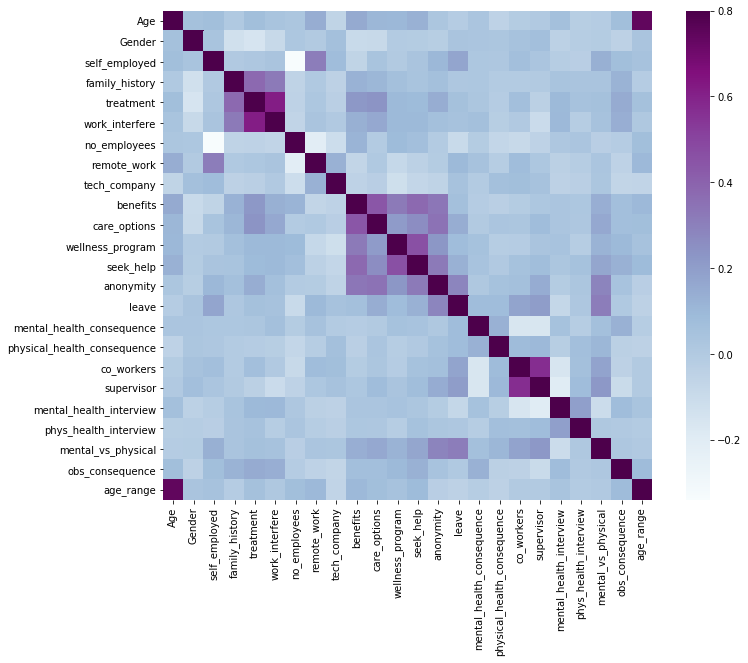

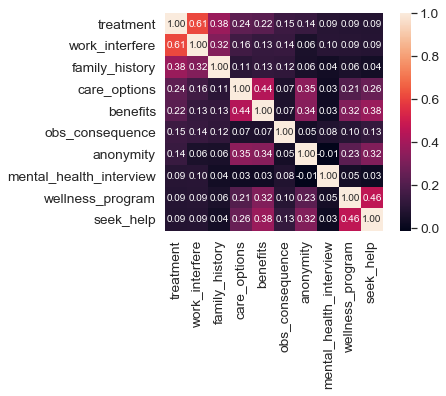

In [26]:
corrmat = train2_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="BuPu",square=True);
plt.show()

#correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train2_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Age Distribiution 

Text(0.5,0,'Age')

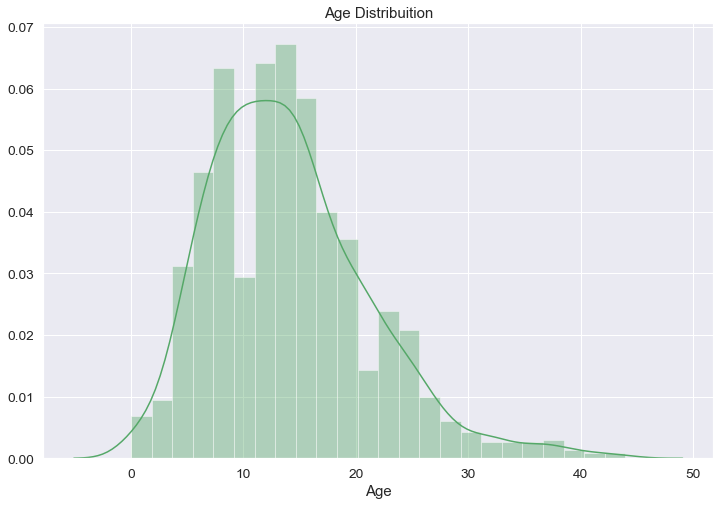

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(train2_df["Age"], bins=24, color='g')
plt.title("Age Distribuition")
plt.xlabel("Age")


## Treatment vs Non-treatment Group by Age

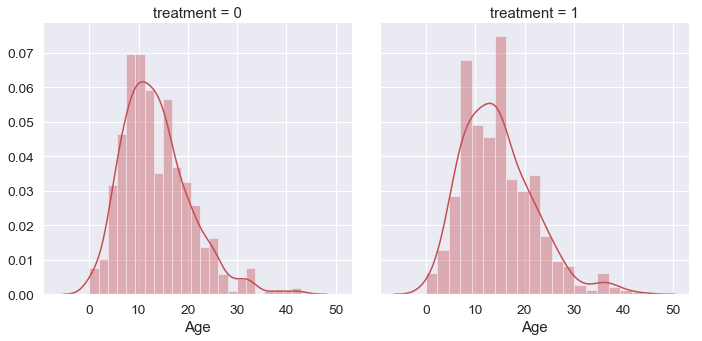

In [28]:
g = sns.FacetGrid(train2_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age", color='r')

## Treatment Distribuition by Gender

Text(0.5,1,'Treatment Distribuition by Gender')

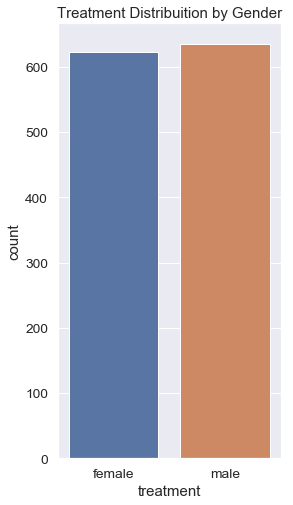

In [29]:
plt.figure(figsize=(4,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train2_df)
g.set_xticklabels(labels)
plt.title('Treatment Distribuition by Gender')

## Probability of mental health condition by age aroup

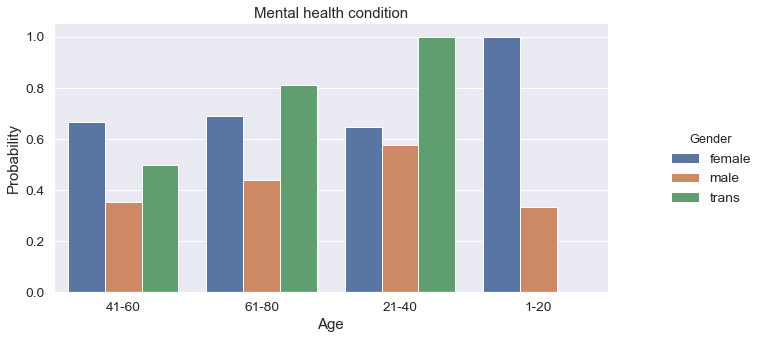

In [34]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train2_df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Mental health condition')
plt.ylabel('Probability')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

## Family history by gender

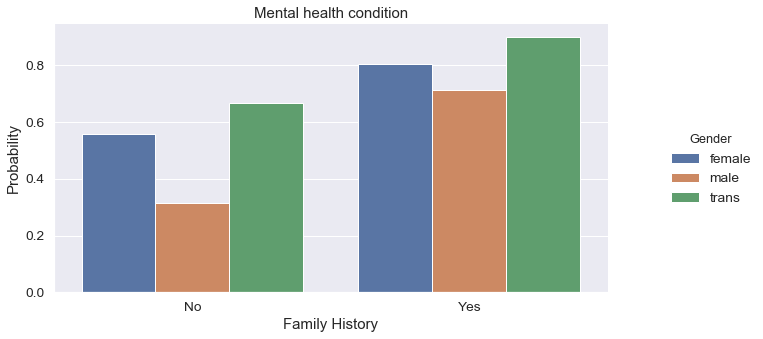

In [35]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train2_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Mental health condition')
plt.ylabel('Probability')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

## Care options by gender

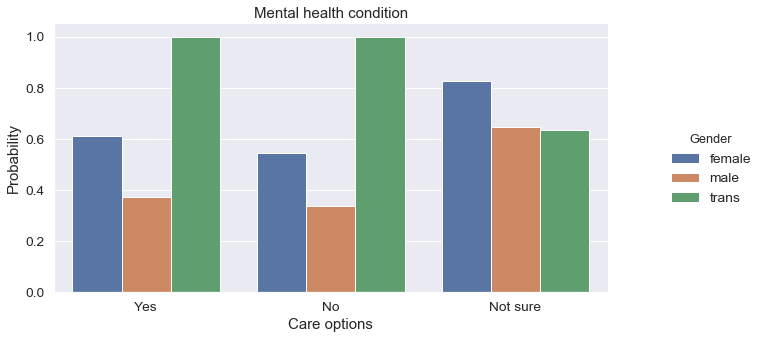

In [37]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train2_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Mental health condition')
plt.ylabel('Probability')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

## Benefits by gender

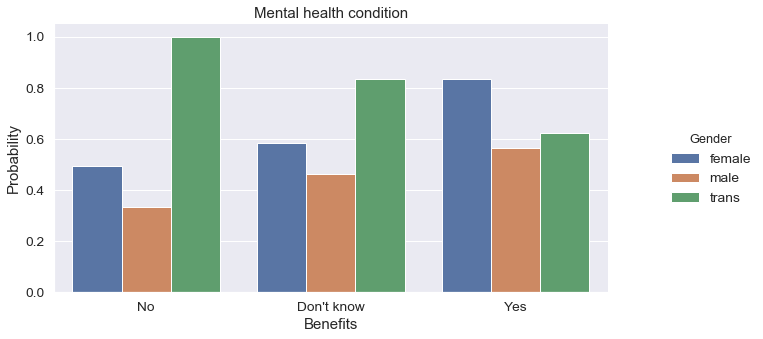

In [40]:
o = labelDict['label_benefits']
g = sns.catplot(x="benefits", y="treatment", hue="Gender", data=train2_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Mental health condition')
plt.ylabel('Probability')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

### Work interfere by gender

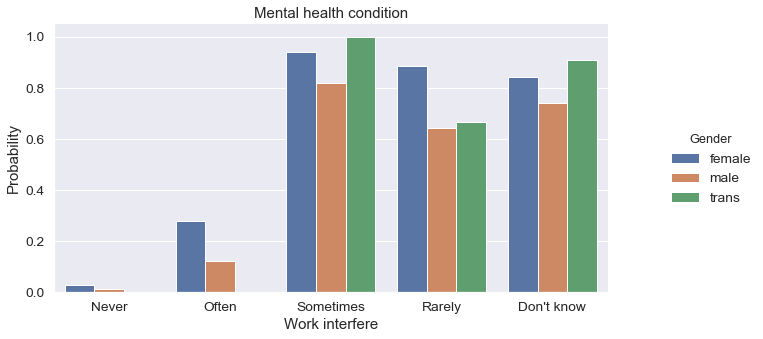

In [41]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train2_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Mental health condition')
plt.ylabel('Probability')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

### Features Scaling

In [42]:
# Scaling Age
scaler = MinMaxScaler()
train2_df['Age'] = scaler.fit_transform(train2_df[['Age']])
train2_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,physical_health_consequence,co_workers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,1
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,1
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,1


## Data splitting

In [43]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train2_df[feature_cols]
y = train2_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

### Use of forests of trees to evaluate the importance of features 

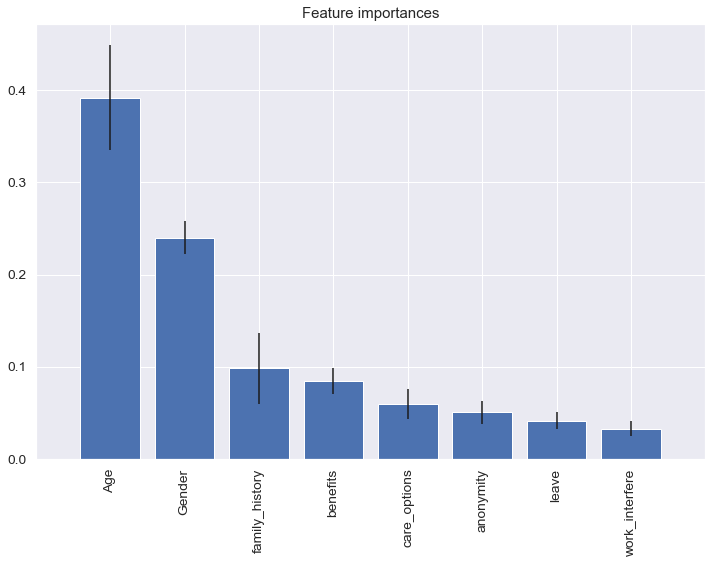

In [47]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Classification Model. 

In [48]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    return accuracy

In [49]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [50]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [51]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [52]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [53]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

## Logistic Regression

In [54]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.798941798941799
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


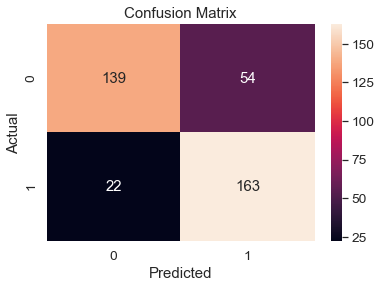

Classification Accuracy: 0.798941798941799
Classification Error: 0.20105820105820105
False Positive Rate: 0.27979274611398963
Precision: 0.7511520737327189
AUC Score: 0.8006441674835456
Cross-validated AUC: 0.8748091877880183
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.09149566 0.90850434]
 [0.9465385  0.0534615 ]
 [0.95233904 0.04766096]
 [0.3215463  0.6784537 ]
 [0.38039077 0.61960923]
 [0.06225324 0.93774676]
 [0.76943355 0.23056645]
 [0.19706506 0.80293494]
 [0.61091112 0.38908888]
 [0.51967702 0.48032298]]
First 10 predicted probabilities:
 [[0.90850434]
 [0.0534615 ]
 [0.04766096]
 [0.6784537 ]
 [0.61960923]
 [0.93774676]
 [0.23056645]
 [0.80293494]
 [0.38908888]
 [0.48032298]]


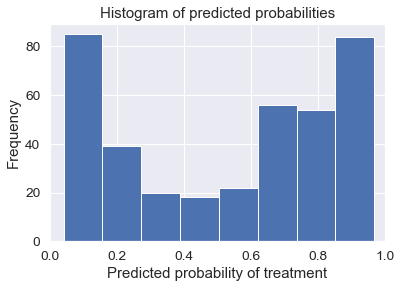

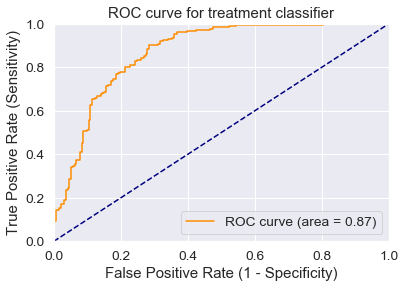

[[139  54]
 [ 22 163]]


In [55]:
logisticRegression()

## KNeighbors Classifier

In [56]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Rand. Best Score:  0.8179650238473768
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.808, 0.816, 0.816, 0.818, 0.818, 0.816, 0.816, 0.808, 0.818, 0.811, 0.803, 0.814, 0.818, 0.818, 0.818, 0.816, 0.816, 0.811, 0.808, 0.818]
########### KNeighborsClassifier ###############
Accuracy: 0.8095238095238095
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


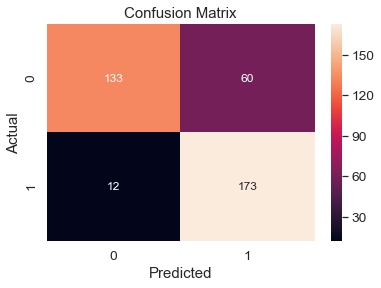

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.31088082901554404
Precision: 0.7424892703862661
AUC Score: 0.8121271530597955
Cross-validated AUC: 0.8797987071172555
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2962963  0.7037037 ]
 [1.         0.        ]
 [1.         0.        ]
 [0.40740741 0.59259259]
 [0.33333333 0.66666667]
 [0.07407407 0.92592593]
 [0.55555556 0.44444444]
 [0.25925926 0.74074074]
 [0.33333333 0.66666667]
 [0.40740741 0.59259259]]
First 10 predicted probabilities:
 [[0.7037037 ]
 [0.        ]
 [0.        ]
 [0.59259259]
 [0.66666667]
 [0.92592593]
 [0.44444444]
 [0.74074074]
 [0.66666667]
 [0.59259259]]


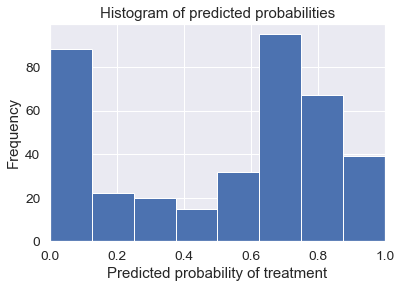

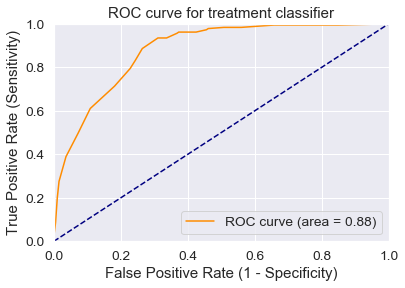

[[133  60]
 [ 12 173]]


In [57]:
Knn()

## Decision Tree classifier

In [58]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

Rand. Best Score:  0.8298887122416534
Rand. Best Params:  {'max_features': 7, 'criterion': 'entropy', 'min_samples_leaf': 7, 'max_depth': 3, 'min_samples_split': 7}
[0.797, 0.828, 0.83, 0.829, 0.824, 0.832, 0.83, 0.83, 0.83, 0.83, 0.83, 0.824, 0.828, 0.83, 0.825, 0.827, 0.829, 0.83, 0.828, 0.83]
########### Tree classifier ###############
Accuracy: 0.8095238095238095
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


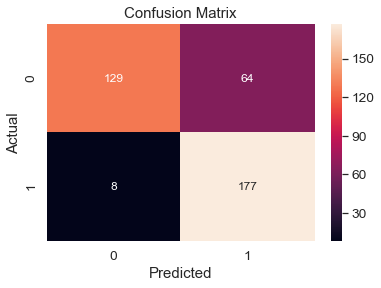

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.3316062176165803
Precision: 0.7344398340248963
AUC Score: 0.8125752695700881
Cross-validated AUC: 0.8870843733998977
First 10 predicted responses:
 [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.1626506  0.8373494 ]
 [1.         0.        ]
 [0.98       0.02      ]
 [0.36633663 0.63366337]
 [0.36633663 0.63366337]
 [0.07317073 0.92682927]
 [0.86153846 0.13846154]
 [0.12244898 0.87755102]
 [0.36633663 0.63366337]
 [0.36633663 0.63366337]]
First 10 predicted probabilities:
 [[0.8373494 ]
 [0.        ]
 [0.02      ]
 [0.63366337]
 [0.63366337]
 [0.92682927]
 [0.13846154]
 [0.87755102]
 [0.63366337]
 [0.63366337]]


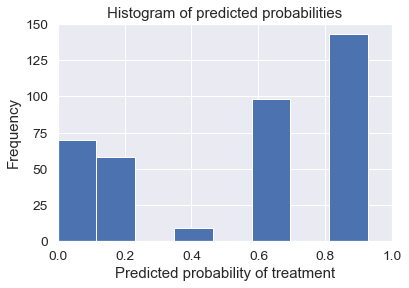

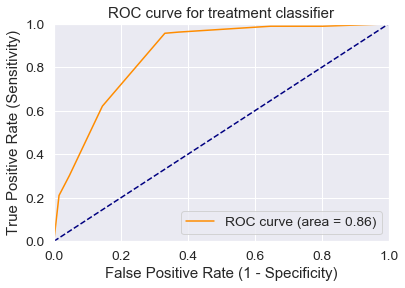

[[129  64]
 [  8 177]]


In [59]:
treeClassifier()

## Random Forests

In [60]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.8298887122416534
Rand. Best Params:  {'max_features': 5, 'criterion': 'gini', 'min_samples_leaf': 4, 'max_depth': 3, 'min_samples_split': 5}
[0.83, 0.83, 0.83, 0.83, 0.831, 0.83, 0.83, 0.831, 0.83, 0.83, 0.831, 0.83, 0.83, 0.831, 0.832, 0.832, 0.836, 0.83, 0.83, 0.83]
########### Random Forests ###############
Accuracy: 0.8068783068783069
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


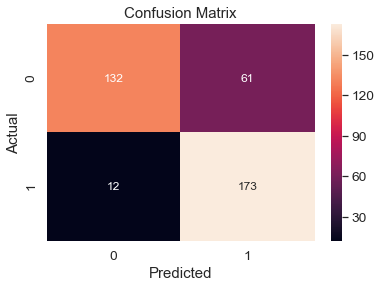

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3160621761658031
Precision: 0.7393162393162394
AUC Score: 0.809536479484666
Cross-validated AUC: 0.8971730190732208
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.22440738 0.77559262]
 [0.96560484 0.03439516]
 [0.98531771 0.01468229]
 [0.53157982 0.46842018]
 [0.39255162 0.60744838]
 [0.20535646 0.79464354]
 [0.76590631 0.23409369]
 [0.33080454 0.66919546]
 [0.34024848 0.65975152]
 [0.30292994 0.69707006]]
First 10 predicted probabilities:
 [[0.77559262]
 [0.03439516]
 [0.01468229]
 [0.46842018]
 [0.60744838]
 [0.79464354]
 [0.23409369]
 [0.66919546]
 [0.65975152]
 [0.69707006]]


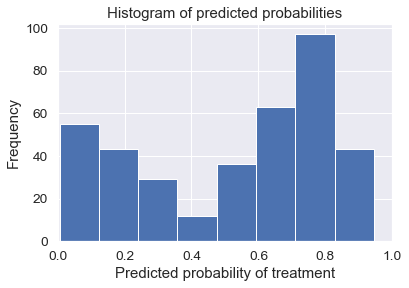

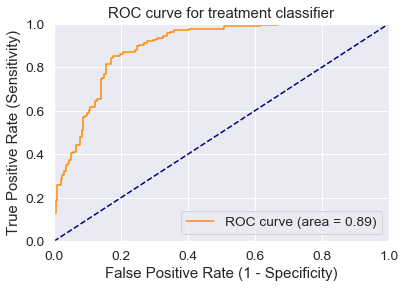

[[132  61]
 [ 12 173]]


In [61]:
randomForest()

## Bagging

In [63]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

########### Bagging ###############
Accuracy: 0.7619047619047619
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1]


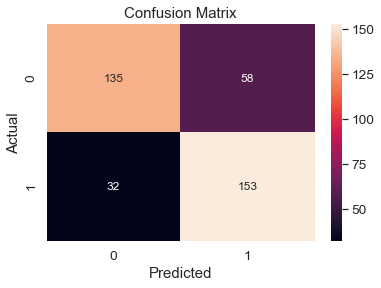

Classification Accuracy: 0.7619047619047619
Classification Error: 0.23809523809523814
False Positive Rate: 0.3005181347150259
Precision: 0.7251184834123223
AUC Score: 0.7632544461560006
Cross-validated AUC: 0.849013936891961
First 10 predicted responses:
 [1 0 0 0 1 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 [0.3 0.7]
 [0.1 0.9]
 [1.  0. ]
 [0.6 0.4]
 [0.1 0.9]
 [0.2 0.8]]
First 10 predicted probabilities:
 [[1. ]
 [0. ]
 [0. ]
 [0.5]
 [0.7]
 [0.9]
 [0. ]
 [0.4]
 [0.9]
 [0.8]]


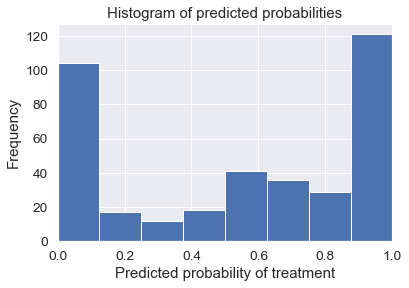

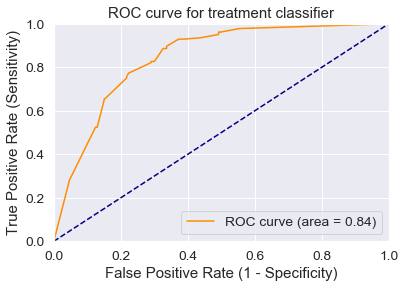

[[135  58]
 [ 32 153]]


In [64]:
bagging()

## Boosting

In [65]:
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.8148148148148148
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1]


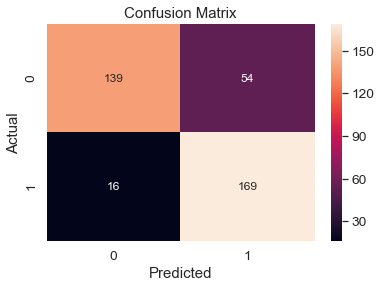

Classification Accuracy: 0.8148148148148148
Classification Error: 0.18518518518518523
False Positive Rate: 0.27979274611398963
Precision: 0.757847533632287
AUC Score: 0.816860383699762
Cross-validated AUC: 0.8743667594726062
First 10 predicted responses:
 [1 0 0 1 0 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49888525 0.50111475]
 [0.50268577 0.49731423]
 [0.50270699 0.49729301]
 [0.49995937 0.50004063]
 [0.5001639  0.4998361 ]
 [0.49814058 0.50185942]
 [0.50053102 0.49946898]
 [0.49955401 0.50044599]
 [0.49925162 0.50074838]
 [0.49932285 0.50067715]]
First 10 predicted probabilities:
 [[0.50111475]
 [0.49731423]
 [0.49729301]
 [0.50004063]
 [0.4998361 ]
 [0.50185942]
 [0.49946898]
 [0.50044599]
 [0.50074838]
 [0.50067715]]


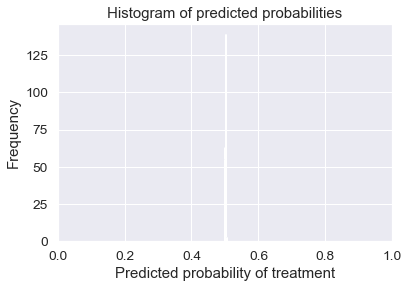

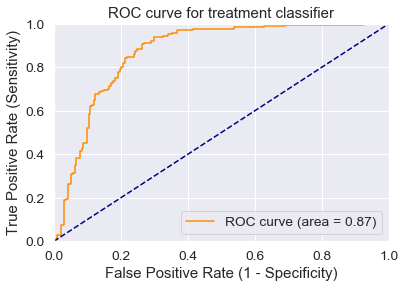

[[139  54]
 [ 16 169]]


In [66]:
boosting()

### Stacking

In [67]:
def stacking():
    # Building and fitting 
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100
    

########### Stacking ###############
Accuracy: 0.7671957671957672
Null accuracy:
 0    193
1    185
Name: treatment, dtype: int64
Percentage of ones: 0.4894179894179894
Percentage of zeros: 0.5105820105820106
True: [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1]
Pred: [1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1]


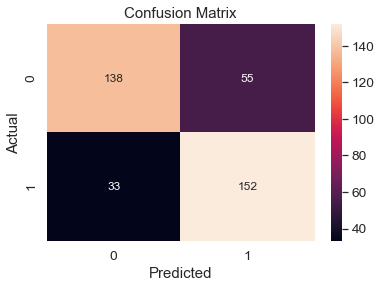

Classification Accuracy: 0.7671957671957672
Classification Error: 0.2328042328042328
False Positive Rate: 0.2849740932642487
Precision: 0.7342995169082126
AUC Score: 0.7683237641786865
Cross-validated AUC: 0.8363427259344597
First 10 predicted responses:
 [1 0 0 0 1 1 0 0 1 0]
First 10 predicted probabilities of class members:
 [[0.01553846 0.98446154]
 [0.9801777  0.0198223 ]
 [0.9801777  0.0198223 ]
 [0.9801777  0.0198223 ]
 [0.36928856 0.63071144]
 [0.01553846 0.98446154]
 [0.9801777  0.0198223 ]
 [0.96991305 0.03008695]
 [0.02363829 0.97636171]
 [0.57136426 0.42863574]]
First 10 predicted probabilities:
 [[0.98446154]
 [0.0198223 ]
 [0.0198223 ]
 [0.0198223 ]
 [0.63071144]
 [0.98446154]
 [0.0198223 ]
 [0.03008695]
 [0.97636171]
 [0.42863574]]


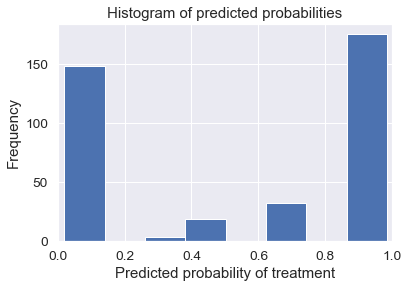

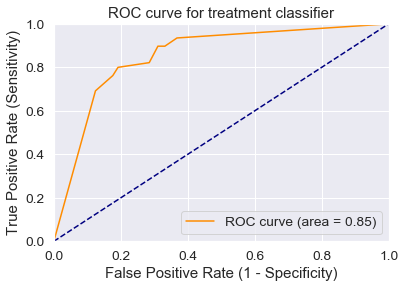

[[138  55]
 [ 33 152]]


In [68]:
stacking()

## Predicting with Neural Network by tensorflow

### Create input functions

In [71]:
import tensorflow as tf
import argparse
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

## Define the tensor feature columns

In [72]:
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

### Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.

In [73]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.train.ProximalAdagradOptimizer(
                                      learning_rate=0.1,
                                      l1_regularization_strength=0.001
                                    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a28f48a58>, '_model_dir': '/var/folders/1d/n394pc850fbd_3fqf70j8rwm0000gn/T/tmpzwmfysjp', '_service': None, '_save_checkpoints_steps': None, '_num_worker_replicas': 1, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_device_fn': None, '_task_type': 'worker', '_task_id': 0, '_train_distribute': None, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600}


### Train the model

In [74]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/1d/n394pc850fbd_3fqf70j8rwm0000gn/T/tmpzwmfysjp/model.ckpt.
INFO:tensorflow:loss = 71.462906, step = 1
INFO:tensorflow:global_step/sec: 379.077
INFO:tensorflow:loss = 37.042027, step = 101 (0.265 sec)
INFO:tensorflow:global_step/sec: 598.301
INFO:tensorflow:loss = 52.616837, step = 201 (0.167 sec)
INFO:tensorflow:global_step/sec: 634.256
INFO:tensorflow:loss = 32.650307, step = 301 (0.158 sec)
INFO:tensorflow:global_step/sec: 645.524
INFO:tensorflow:loss = 42.677982, step = 401 (0.155 sec)
INFO:tensorflow:global_step/sec: 635.691
INFO:tensorflow:loss = 29.122894, step = 501 (0.157 sec)
INFO:tensorflow:global_step/sec: 635.336
INFO:tensorflow:loss = 29.656988, step = 601 (0.158 sec)
INFO:tensorfl

### Evaluate the trained model

In [75]:
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-04-16:27:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1d/n394pc850fbd_3fqf70j8rwm0000gn/T/tmpzwmfysjp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-04-16:27:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8042328, accuracy_baseline = 0.510582, auc = 0.888657, auc_precision_recall = 0.86172724, average_loss = 0.434517, global_step = 1000, label/mean = 0.489418, loss = 41.061855, precision = 0.7302905, prediction/mean = 0.5425501, recall = 0.95135134
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/1d/n394pc850fbd_3fqf70j8rwm0000gn/T/tmpzwmfysjp/model.ckpt-1000

Test set accuracy: 0.80



### Create predictions from the trained model

In [76]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1d/n394pc850fbd_3fqf70j8rwm0000gn/T/tmpzwmfysjp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [77]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []

for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter  
   
    #print(template.format(idx, v, 100 * probability, input))
results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,expected,index,prediction
0,0,824,0
1,1,902,1
2,1,579,1
3,1,367,1
4,1,615,1


## Summary

In [78]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

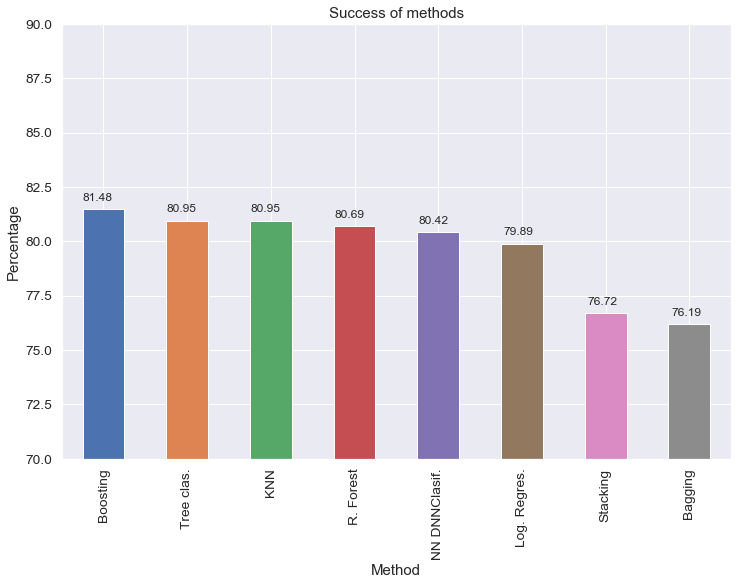

In [79]:
plotSuccess()